# Atividade 6
* **Nome:** Matheus Freitas Martins 
* **Matrícula:** ES111281

# Importando as dependências

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Carregando os dados

In [13]:
data = pd.read_csv('breastcancerwisconsin.csv')

# Preparando os dados

In [14]:
# Removendo as colunas 'id' e 'Unnamed: 32', que não são necessárias para a análise
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Mapeando os valores da coluna 'diagnosis' para 0 (benigno) e 1 (maligno).
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Dividindo os dados em conjuntos de treinamento e teste

In [15]:
# Separando os dados em variáveis independentes (X) e dependentes (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# 80% dos dados para treinamento e 20% para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Função para calcular acurácia, precisão, revocação, especificidade e F1-score

In [16]:
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1])

    return accuracy, precision, recall, specificity, f1

# Treinando o modelo de Regressão Logística

In [17]:
# Padronizando os dados de treinamento e teste
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
metrics_lr = calculate_metrics(y_test, y_pred_lr)

# Treinando o modelo Random Forest

In [18]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
metrics_rf = calculate_metrics(y_test, y_pred_rf)

# Avaliando o modelo

In [19]:
print("Logistic Regression Metrics: Accuracy, Precision, Recall, Specificity, F1-score")
print(metrics_lr)

print("\nRandom Forest Metrics: Accuracy, Precision, Recall, Specificity, F1-score")
print(metrics_rf)

# Calcular os classification reports
report_lr = classification_report(y_test, y_pred_lr, target_names=['Benigno', 'Maligno'])
report_rf = classification_report(y_test, y_pred_rf, target_names=['Benigno', 'Maligno'])

print("\nClassification report - Regressão Logística:")
print(report_lr)

print("Classification report - Random Forest:")
print(report_rf)

Logistic Regression Metrics: Accuracy, Precision, Recall, Specificity, F1-score
(0.9736842105263158, 0.9761904761904762, 0.9534883720930233, 0.9859154929577465, 0.9647058823529412)

Random Forest Metrics: Accuracy, Precision, Recall, Specificity, F1-score
(0.9649122807017544, 0.975609756097561, 0.9302325581395349, 0.9859154929577465, 0.9523809523809524)

Classification report - Regressão Logística:
              precision    recall  f1-score   support

     Benigno       0.97      0.99      0.98        71
     Maligno       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Classification report - Random Forest:
              precision    recall  f1-score   support

     Benigno       0.96      0.99      0.97        71
     Maligno       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg  

**Regressão Logística:**
* **Acurácia:** 0.9737 (97,37%) - A proporção de previsões corretas em relação ao total de previsões. O modelo de Regressão Logística teve uma alta taxa de acerto.
* **Precisão:** 0.9762 (97,62%) - A proporção de verdadeiros positivos em relação à soma dos verdadeiros positivos e falsos positivos. O modelo teve uma alta precisão, o que significa que, quando o modelo previu a classe positiva, estava correto na maioria das vezes.
* **Revocação (Recall):** 0.9535 (95,35%) - A proporção de verdadeiros positivos em relação à soma dos verdadeiros positivos e falsos negativos. O modelo teve uma alta revocação, o que significa que identificou corretamente a maioria das instâncias positivas.
* **Especificidade:** 0.9859 (98,59%) - A proporção de verdadeiros negativos em relação à soma dos verdadeiros negativos e falsos positivos. O modelo teve uma alta especificidade, o que significa que identificou corretamente a maioria das instâncias negativas.
* **F1-score:** 0.9647 (96,47%) - A média harmônica entre a precisão e a revocação. O F1-score é uma métrica que equilibra precisão e revocação e é útil quando as classes estão desequilibradas. Nesse caso, o F1-score indica que o modelo teve um bom equilíbrio entre precisão e revocação.

**Random Forest:**
* **Acurácia:** 0.9649 (96,49%) - O modelo de Random Forest também teve uma alta taxa de acerto, embora ligeiramente menor que a Regressão Logística.
* **Precisão:** 0.9756 (97,56%) - A precisão do modelo de Random Forest foi semelhante à Regressão Logística, indicando um bom desempenho na previsão de casos positivos.
* **Revocação (Recall):** 0.9302 (93,02%) - A revocação foi um pouco menor em comparação com a Regressão Logística, o que significa que o modelo de Random Forest identificou uma proporção menor de casos positivos corretamente.
* **Especificidade:** 0.9859 (98,59%) - A especificidade foi a mesma da Regressão Logística, indicando um bom desempenho na identificação de casos negativos.
* **F1-score:** 0.9524 (95,24%) - O F1-score do modelo de Random Forest foi um pouco menor em comparação com a Regressão Logística, mas ainda assim indicou um bom equilíbrio entre precisão e revocação.

Em resumo, ambos os modelos apresentaram desempenho bastante bom, com a Regressão Logística tendo um desempenho ligeiramente melhor em termos de acurácia, revocação e F1-score.

# Plotando ROC e calculando a AUC

In [20]:
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')
    return auc


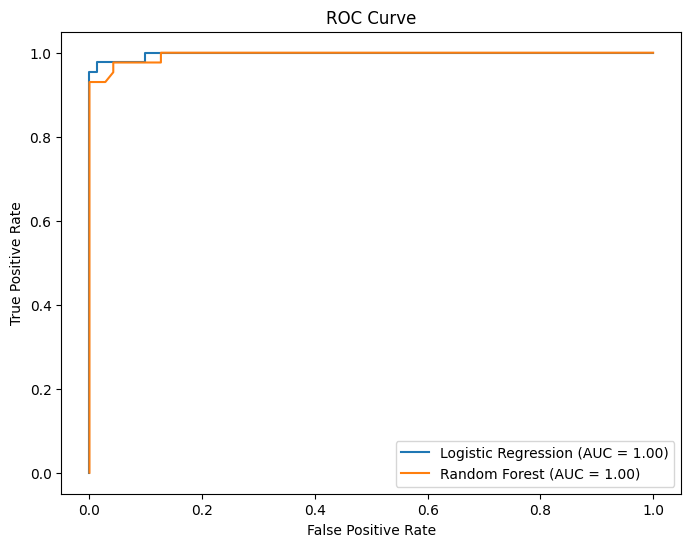

Logistic Regression AUC:  0.99737962659679
Random Forest AUC:  0.9952505732066819


In [21]:
# predict das probabilidades
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 6))
auc_lr = plot_roc_curve(y_test, y_pred_proba_lr, 'Logistic Regression')
auc_rf = plot_roc_curve(y_test, y_pred_proba_rf, 'Random Forest')
plt.show()

print("Logistic Regression AUC: ", auc_lr)
print("Random Forest AUC: ", auc_rf)

A Regressão Logística apresentou uma AUC ligeiramente maior em comparação com o modelo Random Forest, o que indica que este modelo tem um desempenho um pouco melhor na discriminação entre as classes. No entanto, ambos os modelos têm valores de AUC muito próximos e acima de 0.99, o que indica que ambos são altamente eficazes na discriminação entre as classes de tumores.

# Plotando a Matriz de confusão

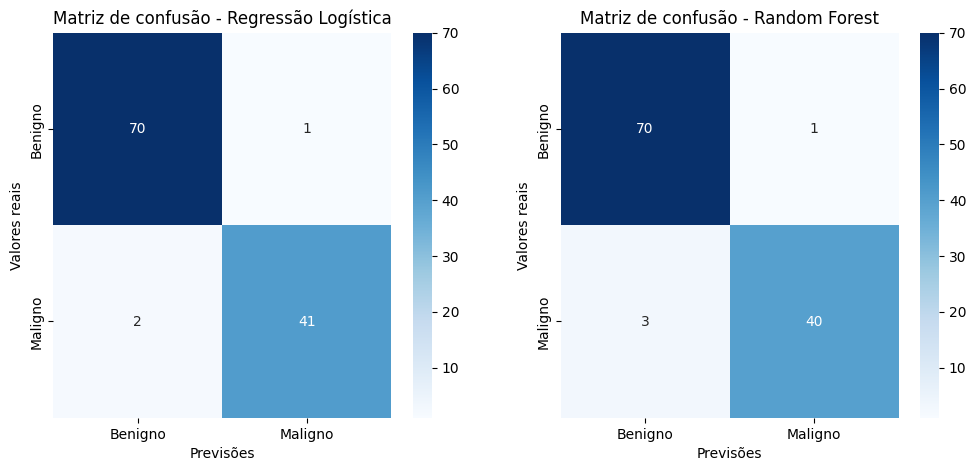

In [22]:
# Calculando as matrizes de confusão para os modelos de Regressão Logística e Random Forest
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotando as matrizes de confusão
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Imprimindo a matriz de confusão para o modelo de Regressão Logística
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', ax=ax1)
ax1.set_title("Matriz de confusão - Regressão Logística")
ax1.set_xlabel("Previsões")
ax1.set_ylabel("Valores reais")
ax1.xaxis.set_ticklabels(["Benigno", "Maligno"])
ax1.yaxis.set_ticklabels(["Benigno", "Maligno"])

# Imprimindo a matriz de confusão para o modelo de Random Forest
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', ax=ax2)
ax2.set_title("Matriz de confusão - Random Forest")
ax2.set_xlabel("Previsões")
ax2.set_ylabel("Valores reais")
ax2.xaxis.set_ticklabels(["Benigno", "Maligno"])
ax2.yaxis.set_ticklabels(["Benigno", "Maligno"])

plt.show()